In [63]:
# Importing relivant tools 
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")



In [80]:
#Importing Databases
df = pd.read_csv('survey_results_public.csv')
df2 = pd.read_csv('2018:survey_results_public.csv')


In [67]:
def country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by India and selecting some columns.
India_2017 = country(df_2017, 'Country', 'India', ['HaveWorkedLanguage', 'WantWorkLanguage'])
India_2018 = country(df_2018, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])


In [81]:
def split_col(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

lang_worked_2017 = split_column(India_2017, 'HaveWorkedLanguage')
lang_wanted_2017 = split_column(India_2017, 'WantWorkLanguage')

lang_worked_2018 = split_column(India_2018, 'LanguageWorkedWith')
lang_wanted_2018 = split_column(India_2018, 'LanguageDesireNextYear')

In [86]:
def array(a_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for r in a_list:
        for obj in r:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_languages_2017_worked = array(lang_worked_2017)
list_languages_2017_wanted = array(lang_wanted_2017)

list_languages_2018_worked = array(lang_worked_2018)
list_languages_2018_wanted = array(lang_worked_2018)

In [88]:
def group(dlist, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    group_list = dict(Counter(dlist))
    group_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return group_dict

# Groping a list and creating a dict.
dict_languages_2017_worked = group_list(list_languages_2017_worked, '2017')
dict_languages_2017_wanted = group_list(list_languages_2017_wanted, '2017')

dict_languages_2018_worked = group_list(list_worked_languages_2018, '2018')
dict_languages_2018_wanted = group_list(list_wanted_languages_2018, '2018')


In [92]:
def create_df(d_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(d_dicts[0])
    df2 = pd.DataFrame(d_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
languages_worked = create_dataframe([dict_languages_2017_worked, dict_languages_2018_worked])
languages_wanted = create_dataframe([dict_languages_2017_wanted, dict_languages_2018_wanted])


In [94]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joinedseries = pd.Series()
    for i in series:
        joinedseries = joinedseries.append(i)
        
    return joinedseries

# Calculating the percentage
languages_worked['Percentage'] = percentage(languages_worked, 'Year')
languages_wanted['Percentage'] = percentage(languages_wanted, 'Year')

In [95]:

# Get the top 10 languages
Highest_10_worked_lang = languages_worked.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
Highest_10_wanted_lang = languages_wanted.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

worked_lang_chart = languages_worked[languages_worked['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = languages_wanted[languages_wanted['Programming Language'].isin(top_10_worked_lang)]


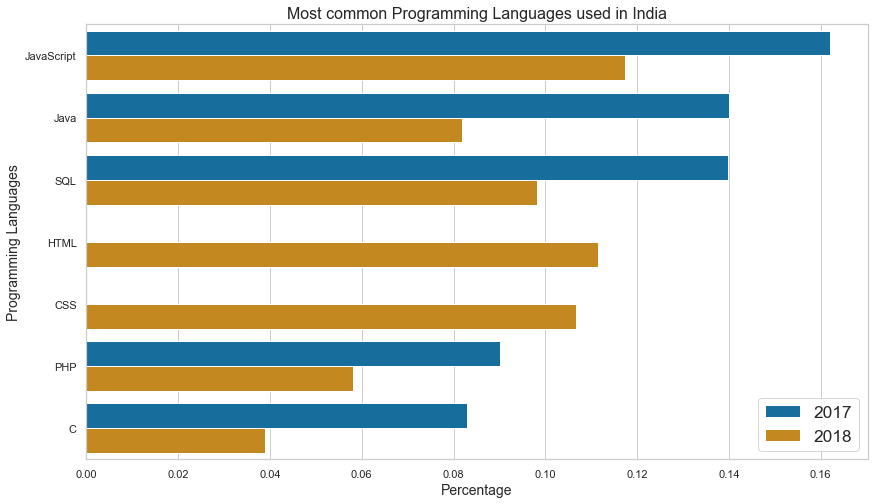

In [113]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            palette="colorblind",
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))


plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most common Programming Languages used in India', size = 16);



### Part 2 — What are the most wanted programming languages in India?

We can see that Python has grown tremendously close to other languages. This is could be happening because it's a programming language that is very versatile and has been used extensively in data related areas.

Most of the programming languages that have appeared is mostly used at work, also appeared in the ranking of most wanted programming languages, this tells us that are many people wanting to learn these languages.

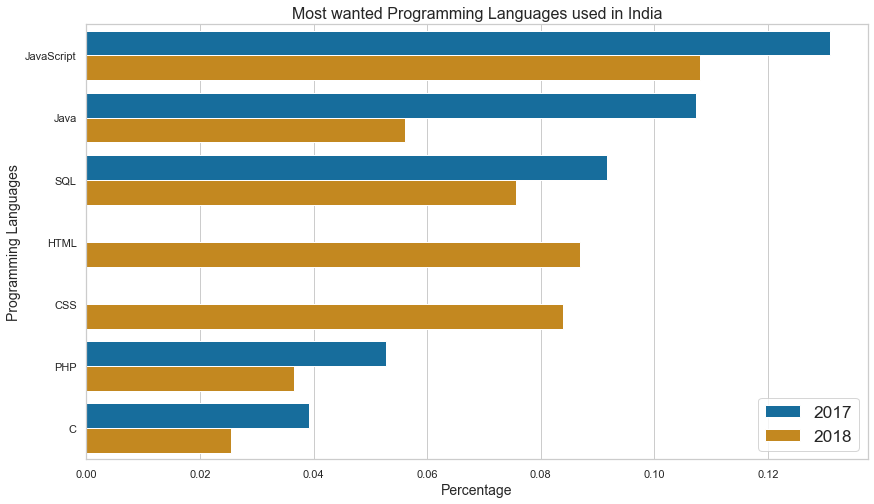

In [114]:
#Percentage of preffered programming languages among all the cited programming

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            palette="colorblind",
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in India', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40');


### Part 3 —How does programming languages used at work relates with programming languages people want to learn?
By looking at the raw data, we can spot some patterns such as for people that use python at work, for example, python is also cited as language that those people wanted to learn in the next year.

What question comes into mind is:

*“The pattern observed for python holds for the other languages?”*

To address this question, we built a heat map that indicate how the work programming languages ​​were related to the desired programming languages. The darker the position gets, the more related the programming language is.



In [127]:
# Grouping data to create a new dataframe

rows = []
for itens in list(zip(worked_lang_2018, wanted_lang_2018)):
    for i in itens[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(itens[0])
        })
        
programming_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()


In [128]:
# Creating a matrix

for row in programming_transition['Worked_PL']:
    programming_transition[row] = 0

for index, row in programming_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_transition[key].loc[index] = (value / total)


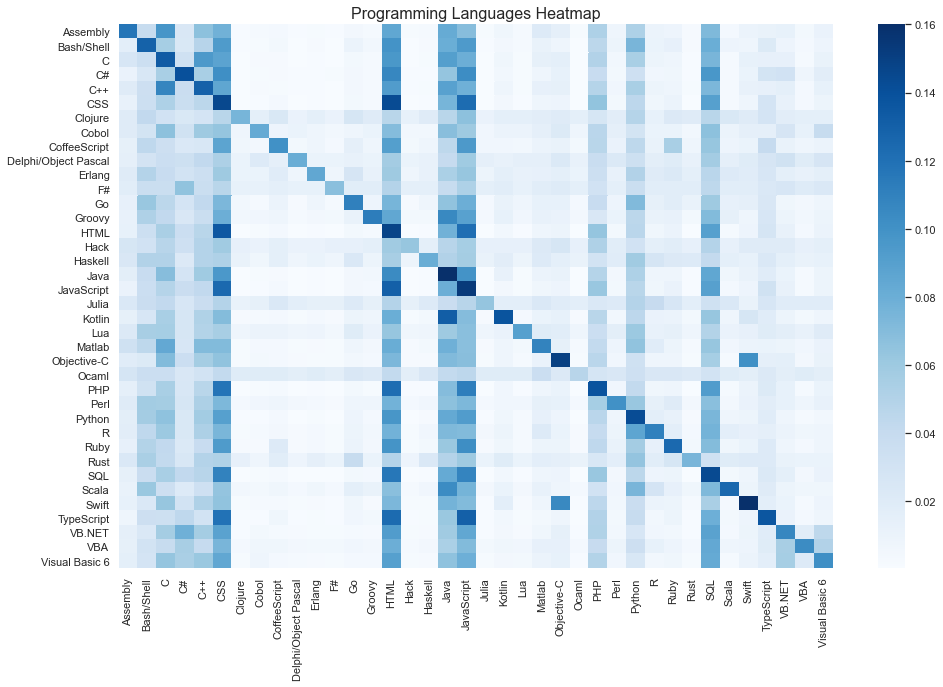

In [130]:
matrix = programming_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="Blues")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

### Insights


People who work with a programming language in a specific area, tend to want to learn programming languages of the same area. For example: HTML is strongly correlated with CSS and JavaScript.

It is evidenced by the diagonal line, people who already work with a programming language have a strong probability of wanting to learn the same programming language.




### Conclusion
In this article, we took a look at what were the most popular and most biased programming languages, according to Stackoverflow’s 2017 and 2018 Annual Developer Survey data.

We have seen that some older programming languages such as JavaScript, SQL, and Java still dominates.
Younger programming languages like Python have been well-deserved to be learned, but the oldest ones still have their value and are being much demanded.
People who already work with a certain programming language have a tendency to learn that language or related languages within correlated areas to improve their own skill.